In this notebook, we construct asset returns and portfolio returns
based on historical price data. This provides the foundation for
subsequent Monte Carlo simulation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
raw = yf.download(
    ["IBM", "GOOG"],
    start="2007-07-01",
    end="2013-06-30",
    auto_adjust=True
)

S = raw["Close"]
S.head()

[*********************100%***********************]  2 of 2 completed


Ticker,GOOG,IBM
Date,,
2007-07-02,13.111646,55.284420
2007-07-03,13.209542,56.110962
2007-07-05,13.389759,56.884861
2007-07-06,13.334632,57.400814
2007-07-09,13.412750,57.369236


**Asset Returns**

We compute daily log-returns from adjusted price data.
Log-returns are additive over time and commonly used in financial modeling.


In [3]:
returns = np.log(S / S.shift(1)).dropna()
returns.head()

Ticker,GOOG,IBM
Date,,
2007-07-03,0.007439,0.014840
2007-07-05,0.013551,0.013698
2007-07-06,-0.004126,0.009029
2007-07-09,0.005841,-0.000550
2007-07-10,0.001437,-0.003125


In [4]:
returns.describe()

Ticker,GOOG,IBM
count,1509.000000,1509.000000
mean,0.000336,0.000467
std,0.020984,0.015495
min,-0.123402,-0.086419
25%,-0.008939,-0.006827
50%,0.000480,0.000522
75%,0.010098,0.008522
max,0.182251,0.108989


The summary statistics indicate small average daily returns
and non-negligible volatility across assets.

 **Correlation Structure**

Understanding correlations between assets is essential
for portfolio construction and risk management.

In [6]:
returns.corr()

Ticker,GOOG,IBM
Ticker,,
GOOG,1.000000,0.502535
IBM,0.502535,1.000000


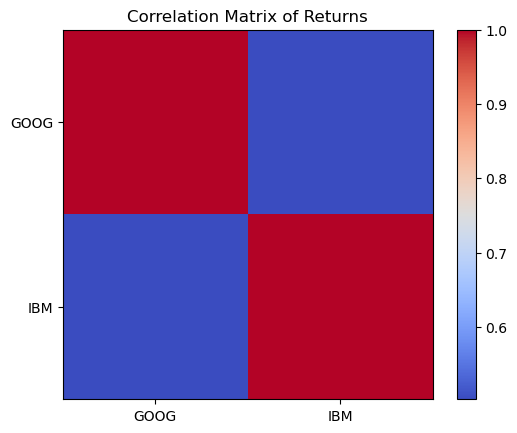

In [7]:
plt.imshow(returns.corr(), cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Matrix of Returns")
plt.xticks(range(len(returns.columns)), returns.columns)
plt.yticks(range(len(returns.columns)), returns.columns)
plt.show()

**Portfolio Construction**

We construct a simple equally-weighted portfolio
to aggregate individual asset returns.

In [9]:
n_assets = returns.shape[1]
weights = np.array([0.5, 0.5])
weights

array([0.5, 0.5])

In [10]:
portfolio_returns = returns @ weights
portfolio_returns.head()

Date
2007-07-03    0.011139
2007-07-05    0.013624
2007-07-06    0.002452
2007-07-09    0.002645
2007-07-10   -0.000844
dtype: float64

**Portfolio Returns**

We analyze the time series and distribution of portfolio returns.


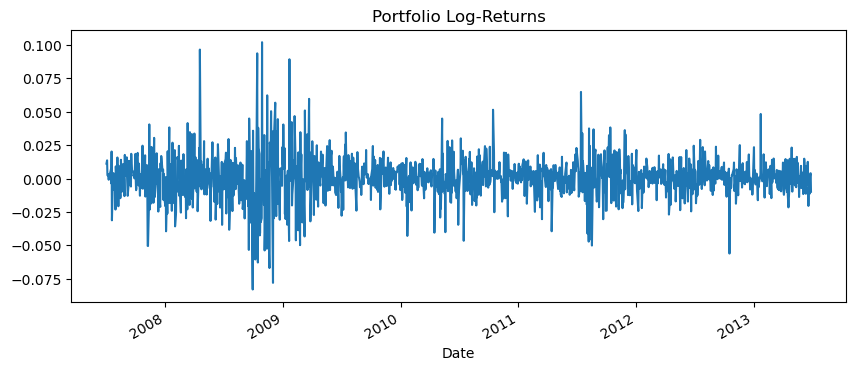

In [11]:
portfolio_returns.plot(figsize=(10,4))
plt.title("Portfolio Log-Returns")
plt.show()

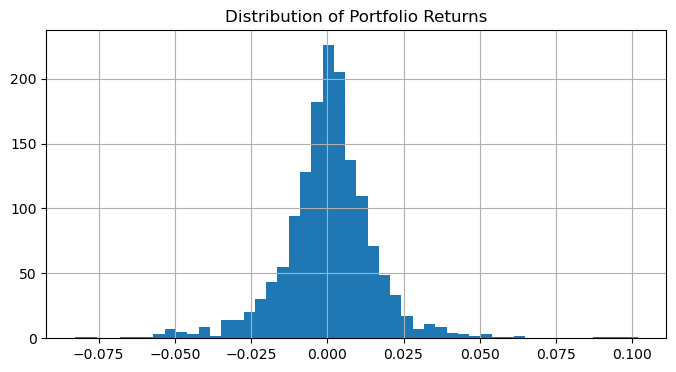

In [12]:
portfolio_returns.hist(bins=50, figsize=(8,4))
plt.title("Distribution of Portfolio Returns")
plt.show()

In [13]:
portfolio_returns.describe()

count    1509.000000
mean        0.000401
std         0.015868
min        -0.082912
25%        -0.006781
50%         0.000785
75%         0.007797
max         0.101964
dtype: float64

**Summary**

- Asset log-returns were constructed from adjusted price data.
- Correlations between assets were examined.
- A simple portfolio was formed using fixed weights.
- The resulting portfolio returns will be used as input
  for Monte Carlo simulation in the next notebook.